<div class="alert alert-block alert-info">
    <b>Libraries</b></div>

In [1]:
# Data manipulation and analysis
# ==============================
import numpy as np
import pandas as pd

# Data visualization
# ======================
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Handling imbalanced datasets
# =============================
from imblearn.over_sampling import SMOTE  # Over-sampling
from imblearn.under_sampling import RandomUnderSampler  # Under-sampling

# Data preprocessing, model selection and evaluation
# =================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Machine learning model
# ==========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Handling warnings
# ===================
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
    <b>Import Data</b></div>

In [2]:
df = pd.read_csv("C:\\Users\ASUSPC\\credit_card_fraud\\creditcard.csv")

<div class="alert alert-block alert-info">
    <b>EDA</b></div>

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The dataset contains transactions made by European users using credit card during two days in September 2013 .
The dataset includes 492 frauds out of 284,807 transactions, and it is highly unbalanced since the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality, it includes only numerical values as a result of a PCA transformation.

- Features from V1 to V28 are the principal components obtained with PCA.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The variable 'Amount' which indicates the amount of the transaction, can be used for example-dependant cost-sensitive learning.
- Variable 'Class' is the target variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

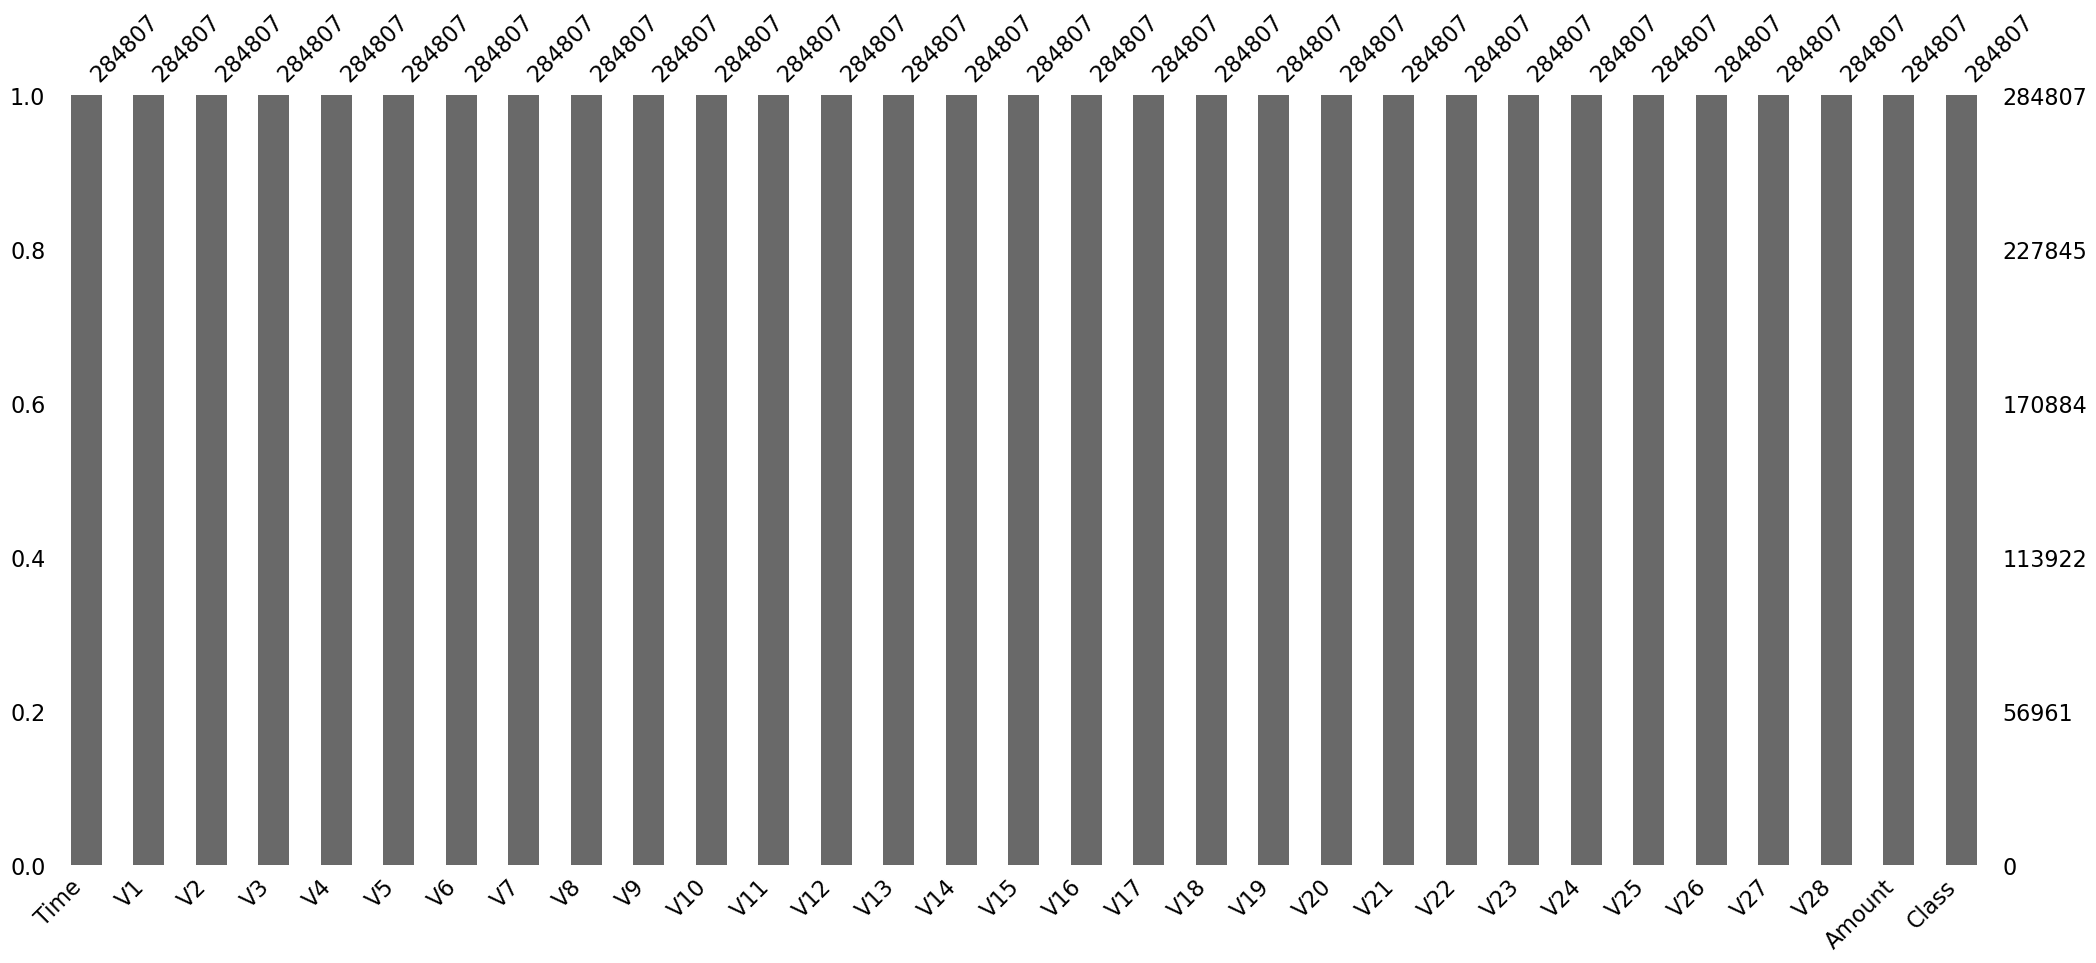

In [9]:
msno.bar(df)
plt.show()

It seems that the dataframe has no NaN.

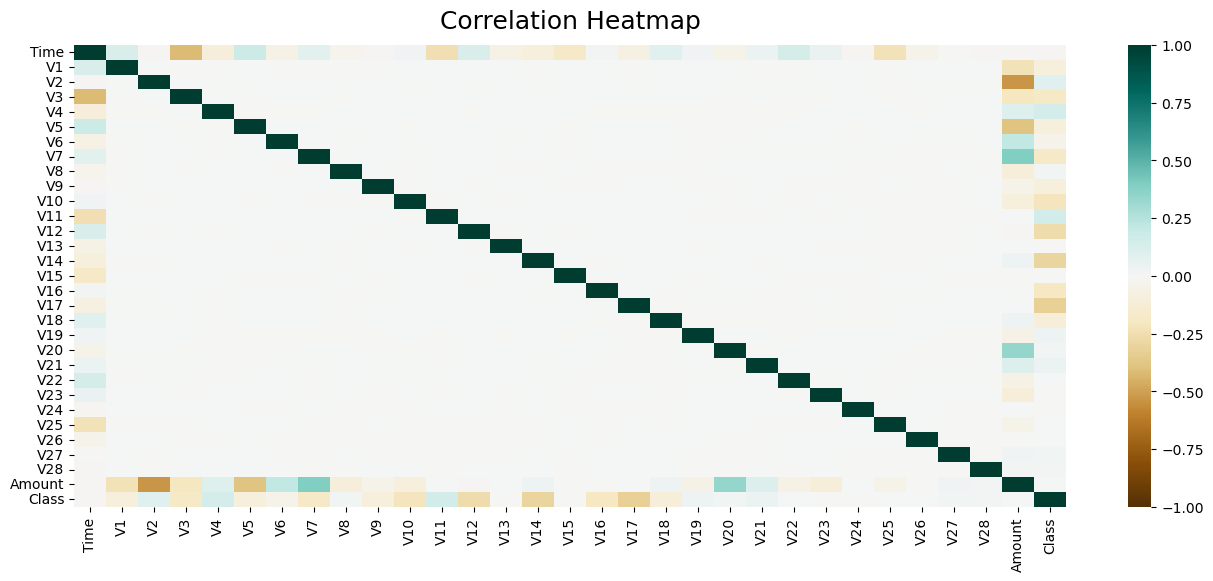

In [10]:
# Plotting the correlation between variables
# ===========================================

plt.figure(figsize=(16, 6))
matrix = np.triu(df.corr())
heatmap = sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

It appears that certain variables, such as V2, V7 and V20, exhibit a correlation with the ‘Amount’. However, given that the origins of these variables were unknown prior to the Principal Component Analysis (PCA), it seems prudent to proceed with the analysis using these variables in their current form. This approach ensures that we maintain the integrity of the PCA’s output while conducting our analysis.

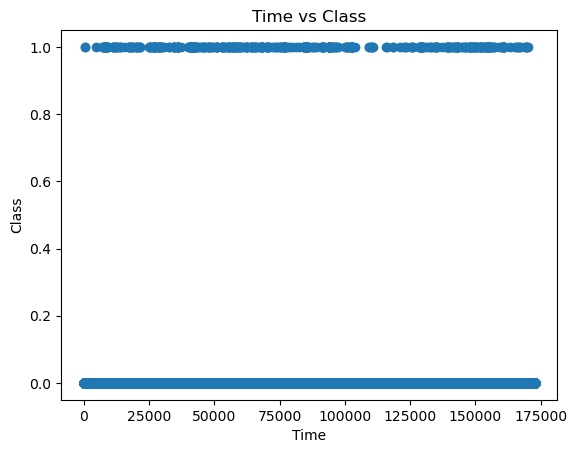

In [11]:
# Plotting 'Time' against 'Class' to visualize their relationship
# ===========================================================

plt.scatter(df['Time'], df['Class'])
plt.xlabel('Time')
plt.ylabel('Class')
plt.title('Time vs Class')
plt.show()

It seems that the fraudulent and non-fraudulent transactions are almost evenly distributed across the time variable. It suggests that the time of transaction might not be a strong indicator of whether a transaction is fraudulent. In other words, fraudulent transactions are not more likely to occur at certain times compared to non-fraudulent transactions.

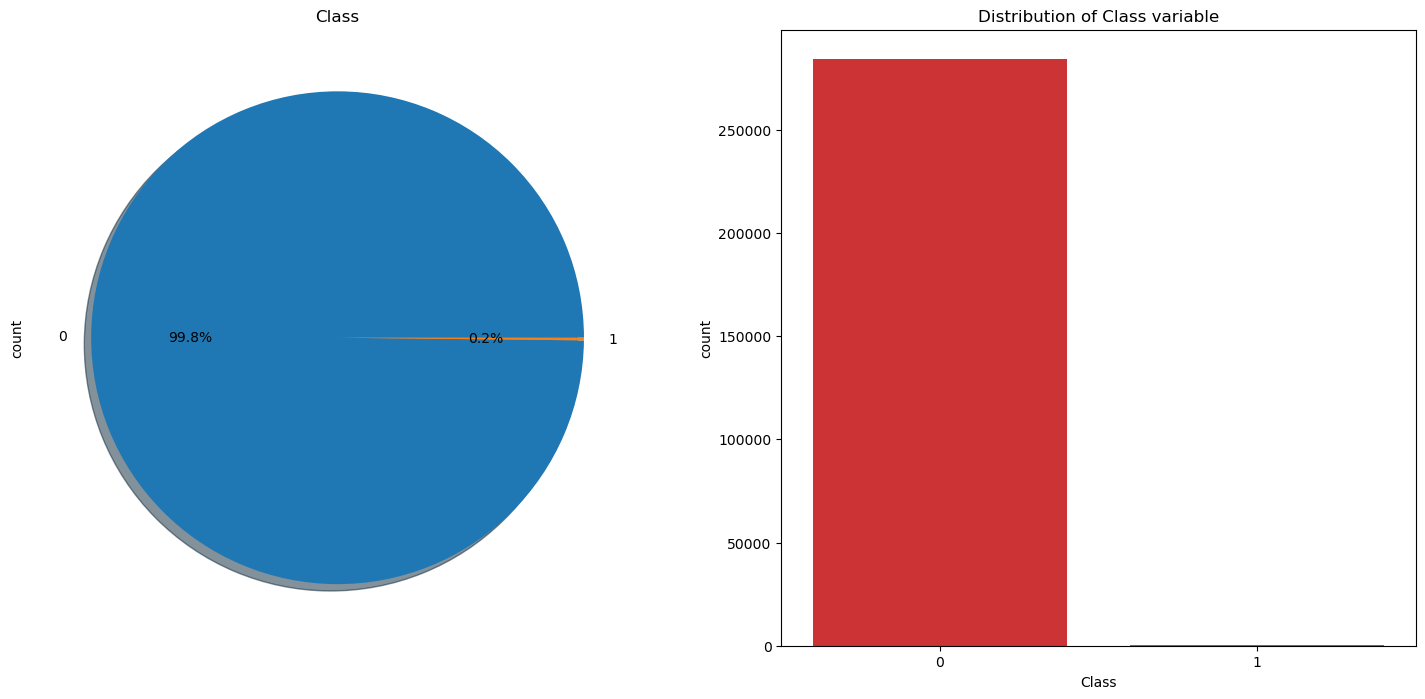

In [12]:
# visualize frequency distribution of Class variable
# =================================================

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Class'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Class", data=df, palette="Set1")
ax[1].set_title("Distribution of Class variable")

plt.show()

In [13]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We can see that the majority of transactions appear to be legitimate, specifically 492 out of 284,807 are being identified as fraudulent. This confirm that our dataset is highly unbalanced.

In [14]:
# Amount of legitimate transactions
# ===============================

round(df.loc[df['Class'] == 0, 'Amount'].describe(),2)

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

In [15]:
# Amount of fraudulent transactions
# ===============================

round(df.loc[df['Class'] == 1, 'Amount'].describe(),2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

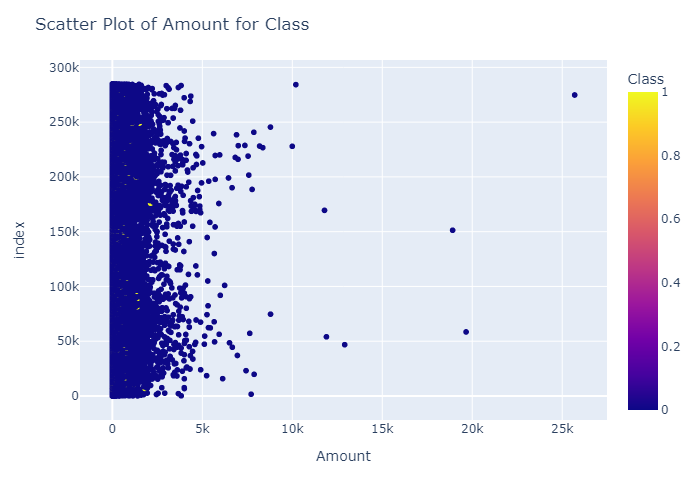

In [16]:
# Visualazing Amount for Class
# ===============================

fig = px.scatter(df, x="Amount", y=df.index, color='Class')
fig.update_layout(title_text="Scatter Plot of Amount for Class")
fig.show('png')

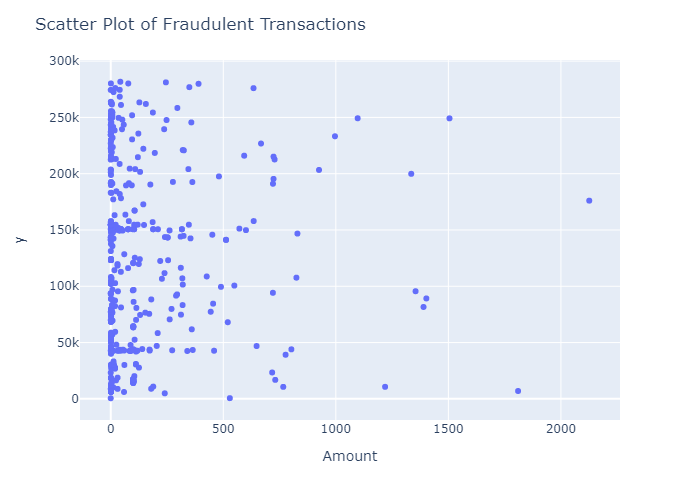

In [17]:
# Visualizing fraudulent transactions
# ===============================

fig = px.scatter(df.loc[df['Class'] == 1, 'Amount'], x="Amount", y=df.loc[df['Class'] == 1, 'Amount'].index)
fig.update_layout(title_text="Scatter Plot of Fraudulent Transactions")
fig.show('png')

Observing the dataset, it appears that fraudulent transactions predominantly occur within a lower range of transaction amounts. This is evident considering that the highest fraudulent recorded transaction was of a relatively moderate value of  € 2125.87. This trend suggests that fraudulent activities tend to involve transactions of lower monetary value compared to the maximum transaction amount within the dataset.

<div class="alert alert-block alert-info">
    <b>Data Preprocessing</b></div>

In [18]:
# Dropping the Time variable since doesn't seem to be relevant
# ============================================================

df = df.drop(columns = ['Time'], axis = 1)

In [19]:
# Dividing dataset
# ==================

X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [20]:
# Train and test split 70/30
# ============================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

Given that the ‘Amount’ variable contains outliers, we will utilize the RobustScaler. This is a good choice because RobustScaler is less sensitive to outliers than other scaling methods.

In [21]:
# Instantiate the RobustScaler
# ===============================
scaler = RobustScaler()

# Fit and transform on the training set
X_train['Amount'] = scaler.fit_transform(X_train.Amount.values.reshape(-1,1))
print(X_train.shape)

# Transform the test set with the same scaler
X_test['Amount'] = scaler.transform(X_test.Amount.values.reshape(-1,1))
print(X_test.shape)

(199364, 29)
(85443, 29)


Now we are going to perform a “spot check” on multiple machine learning models using both oversampling and undersampling techniques.

Here’s a brief explanation of what the code does:

Define Models: We first define a list of models that we want to evaluate. In this case, we’re evaluating Decision Tree, Logistic Regression, and Random Forest models.

Resampling: We apply two resampling techniques - oversampling using SMOTE (Synthetic Minority Over-sampling Technique) and undersampling using RandomUnderSampler. These techniques are used to balance the classes in our dataset. Oversampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. Undersampling, on the other hand, reduces the number of instances in the majority class to balance out the ratio of majority to minority class.

Spot Checking: For each resampling method, we fit and evaluate each model on the resampled data. We use cross-validation for evaluation, which provides a robust estimate of the model’s performance by dividing the dataset into ‘k’ subsets and then training the model ‘k’ times, each time using a different subset as the validation set.

Evaluation Metrics: We evaluate the models based on precision, recall, and accuracy. Precision is the ratio of correctly predicted positive observations to the total predicted positives. Recall (Sensitivity) is the ratio of correctly predicted positive observations to all the observations in actual class. Accuracy is the ratio of correctly predicted observations to the total observations.

By doing this, we can identify which models perform well on our dataset with both oversampling and undersampling techniques.

In [22]:
# Spot-Check Algorithms
# ==========================

def GetBasedModel():
    basedModels = []
    basedModels.append(('DT' , DecisionTreeClassifier()))
    basedModels.append(('LOG'   , LogisticRegression()))
    basedModels.append(('RF'   , RandomForestClassifier()))

    
    return basedModels

In [23]:
# Define the resampling methods
# ===============================
resamplers = [('OverSampling', SMOTE()), ('UnderSampling', RandomUnderSampler())]

In [24]:
# Define the evaluation method
# =============================================
def BasedLine2(X_train, y_train, models, resampler_name, resampler):
    num_folds = 5
    scoring = ['precision', 'recall', 'accuracy']

    # Apply the resampling method
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
        cv_results = cross_validate(model, X_resampled, y_resampled, cv=kfold, scoring=scoring, n_jobs=-1)
        results.append(cv_results)
        names.append(name)
        msg = "%s with %s: (Mean Precision - %f), (Mean Recall - %f), (Mean Accuracy - %f)" % (name, resampler_name, cv_results['test_precision'].mean(), cv_results['test_recall'].mean(), cv_results['test_accuracy'].mean())
        print(msg)
        
    return names, results

In [25]:
# Test each model with both the oversampled and undersampled data
# ==================================================
models = GetBasedModel()
for resampler_name, resampler in resamplers:
    print(f"\nPerforming {resampler_name}")
    names, results = BasedLine2(X_train, y_train, models, resampler_name, resampler)


Performing OverSampling
DT with OverSampling: (Mean Precision - 0.997236), (Mean Recall - 0.998950), (Mean Accuracy - 0.998091)
LOG with OverSampling: (Mean Precision - 0.971329), (Mean Recall - 0.917013), (Mean Accuracy - 0.944972)
RF with OverSampling: (Mean Precision - 0.999769), (Mean Recall - 0.999995), (Mean Accuracy - 0.999882)

Performing UnderSampling
DT with UnderSampling: (Mean Precision - 0.903330), (Mean Recall - 0.882121), (Mean Accuracy - 0.893253)
LOG with UnderSampling: (Mean Precision - 0.960589), (Mean Recall - 0.904460), (Mean Accuracy - 0.932542)
RF with UnderSampling: (Mean Precision - 0.981952), (Mean Recall - 0.898826), (Mean Accuracy - 0.940993)


Based on these results, the Random Forest model with OverSampling appears to be the best performing model-method combination, as it achieved almost perfect scores in all three metrics.

In [26]:
X_train_resampled, y_train_resampled  = SMOTE().fit_resample(X_train,y_train)

In [27]:
y_train_resampled.value_counts()

Class
0    199008
1    199008
Name: count, dtype: int64

**Random Forest Model**

In [28]:
# Starting with a basic Random Forest Classifier
# =================================================

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=-1)
random_forest.fit(X_train_resampled, y_train_resampled)
 
y_predict = random_forest.predict(X_test)

In [29]:
# Metrics for Random Forest
# ============================
metrics = [
    ('Accuracy', accuracy_score),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('F1_score', f1_score)
]

# Calculate and print evaluation metrics for Random Forest
for metric_name, metric_func in metrics:
    value = metric_func(y_test, y_predict)
    print(f'{metric_name}: {value:.4f}')

Accuracy: 0.9996
Precision: 0.8500
Recall: 0.8750
F1_score: 0.8623


Accuracy (0.9996): This is the proportion of the total number of predictions that were correct. It is determined using the equation (true positives + true negatives) / (total observations). The model’s accuracy is very high, which indicates that it made correct predictions for 99.96% of the instances.

Precision (0.8500): This is the proportion of positive identifications that were actually correct. It is calculated as (true positives) / (true positives + false positives). A precision of 0.8500 means that when your model predicts an instance is positive, it is correct about 85% of the time.

Recall (0.8750): This is the proportion of actual positives that were identified correctly. It is calculated as (true positives) / (true positives + false negatives). A recall of 0.8750 means the model correctly identifies 87.50% of all positive instances.

F1 Score (0.8623): The F1 Score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. The model’s F1 score is 0.8623, which is quite good as it means the model itself has a good balance between precision and recall.

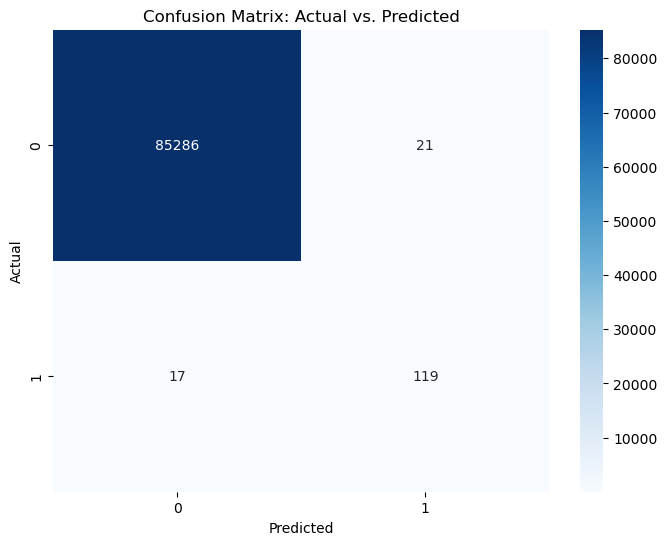

In [30]:
conf_matrix = confusion_matrix(y_test, y_predict)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Actual vs. Predicted')
plt.show()

In summary, the model correctly predicted 85286 negative instances and 119 positive instances, while it incorrectly predicted 21 instances as positive that were actually negative and 17 instances as negative that were actually positive. 

In conclusion, while the model demonstrates excellent overall performance, there are opportunities for further enhancement, particularly in the areas of precision and recall. For example, exploring options such as hyperparameter tuning could lead to improvements.